6.0
4.0


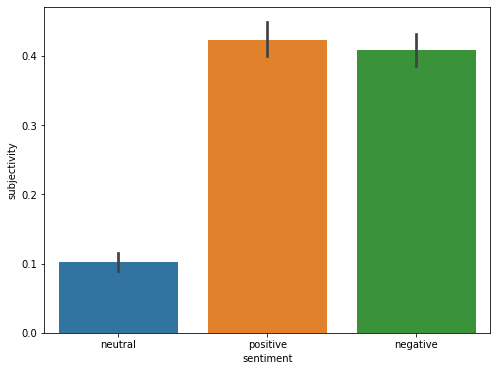

In [24]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# data_source_url = "https://raw.githubusercontent.com/kolaveridi/kaggle-Twitter-US-Airline-Sentiment-/master/Tweets.csv"
data_source_url = "../presidential_candidates_2020.csv"
candidate_tweets = pd.read_csv(data_source_url)
candidate_tweets.head()

plot_size = plt.rcParams["figure.figsize"]
print(plot_size[0])
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size

# candidate_tweets.candidate.value_counts().plot(kind='pie', autopct='%1.0f%%')
# candidate_tweets.sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])
# airline_sentiment = candidate_tweets.groupby(['candidate', 'sentiment']).sentiment.count().unstack()
# airline_sentiment.plot(kind='bar')

# sns.barplot(x='sentiment', y='subjectivity' , data=candidate_tweets)
